In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as sil_score
from sklearn.metrics import balanced_accuracy_score, RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.base import clone
from sklearn import metrics
import seaborn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from collections import Counter
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [5]:
df = pd.read_csv('sample-1-25.csv')
y_col, x_col = df.columns[0], df.columns[1::]


In [6]:
Counter(df[y_col])

Counter({0: 1987514, 1: 2490})

In [7]:
x_resampled, y_resampled = SMOTE(random_state=44).fit_resample(df[x_col], df[y_col])

In [8]:
df = pd.DataFrame(x_resampled)
df['FRD_IND'] = y_resampled
df

,APPRD_AUTHZN_CNT,AVG_DLY_AUTHZN_AMT,MRCH_CATG_CD,POS_ENTRY_MTHD_CD,RCURG_AUTHZN_IND,DISTANCE_FROM_HOME,ACCT_CURR_BAL,AUTHZN_AMT,AUTHZN_OUTSTD_AMT,PLSTC_ISU_DUR,FRD_IND
0,3,7,5812,90,0,0.000000,2498.210000,15.520000,94.280000,805,0
1,1,6,5541,90,0,0.000000,88.880000,46.560000,56.310000,68,0
2,4,0,5965,81,0,358.850300,1934.360000,16.340000,927.130000,190,0
3,0,3,5542,90,0,4.293625,916.040000,1.000000,0.000000,217,0
4,1,2,5814,90,0,509.830350,166.620000,10.660000,10.660000,110,0
...,...,...,...,...,...,...,...,...,...,...,...
3975023,2,0,8053,81,0,1997.604434,1484.799125,9.998705,34.873814,802,1
3975024,1,168,5271,90,0,4.777724,1893.551722,66.090234,83.060448,34,1
3975025,3,0,5734,81,0,2563.980640,345.248867,3.946501,21.720971,833,1
3975026,1,3,5541,90,0,21.115364,208.317144,28.344336,50.344679,679,1


In [9]:
df['Round'] = [int(np.random.rand()*10) for i in range(len(df.index))]

In [10]:
df

,APPRD_AUTHZN_CNT,AVG_DLY_AUTHZN_AMT,MRCH_CATG_CD,POS_ENTRY_MTHD_CD,RCURG_AUTHZN_IND,DISTANCE_FROM_HOME,ACCT_CURR_BAL,AUTHZN_AMT,AUTHZN_OUTSTD_AMT,PLSTC_ISU_DUR,FRD_IND,Round
0,3,7,5812,90,0,0.000000,2498.210000,15.520000,94.280000,805,0,4
1,1,6,5541,90,0,0.000000,88.880000,46.560000,56.310000,68,0,7
2,4,0,5965,81,0,358.850300,1934.360000,16.340000,927.130000,190,0,6
3,0,3,5542,90,0,4.293625,916.040000,1.000000,0.000000,217,0,0
4,1,2,5814,90,0,509.830350,166.620000,10.660000,10.660000,110,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3975023,2,0,8053,81,0,1997.604434,1484.799125,9.998705,34.873814,802,1,3
3975024,1,168,5271,90,0,4.777724,1893.551722,66.090234,83.060448,34,1,7
3975025,3,0,5734,81,0,2563.980640,345.248867,3.946501,21.720971,833,1,5
3975026,1,3,5541,90,0,21.115364,208.317144,28.344336,50.344679,679,1,7


In [11]:
for i in range(10):
    print(np.unique(df[df['Round'] == i]['FRD_IND'], return_counts=True)[1])

[199689 199132]
[198552 198450]
[198853 198144]
[198652 198002]
[199051 198662]
[197999 199201]
[199108 199093]
[198382 198519]
[198369 199503]
[198859 198808]


## Offense

In [12]:
# MY function
def get_best_strategy_indicies(y_actual, y_pred, threshold, y_prob):  # Need to remove the y_prob since it implies that the adversary can access the classification model
    y_actual = np.array(y_actual)
    wrong_indicies = ~np.equal(y_pred,y_actual)
    fn = wrong_indicies & (y_actual & np.logical_not(y_pred))
    fn_index = np.where(fn)[0]
    
    positive, negative = confusion_matrix(y_actual, y_pred)
    assert negative[0] == len(fn_index), "Number of false negative do not match number of false negative indicies"
    return np.array(fn_index)

def append_and_smote(best_strat_indicies, x, y, smote):
    y = np.array(y)
    non_fraud_indicies = np.where(np.logical_not(y))[0]
    new_combined_indicies = np.concatenate((non_fraud_indicies, best_strat_indicies), axis=None)

    new_combined_indicies = new_combined_indicies.tolist()
    # To fix float error
    new_combined_indicies = list(map(int, new_combined_indicies))
    
    new_x = x.iloc[new_combined_indicies]
    new_y = y[new_combined_indicies]
    
    print("new_y: ", new_y)
    
    x_resampled, y_resampled = smote.fit_resample(new_x, new_y)
    
    print("y_resampled: ", y_resampled)
    
    return x_resampled, y_resampled
    

In [13]:
init_df = df[df['Round'] == 0]
x, y = init_df[init_df.columns[0:-2]], init_df[init_df.columns[-2::]]

In [14]:
y_total_data = []
ydata = []

In [15]:
# Need to run the following cell before the simulation

In [16]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y['FRD_IND'], random_state=42)
print(Counter(y_tr))
print(Counter(y_te))

Counter({0: 149701, 1: 149414})
Counter({0: 49988, 1: 49718})


## Defense

Random Forest Accuracy:  0.9045092572162157


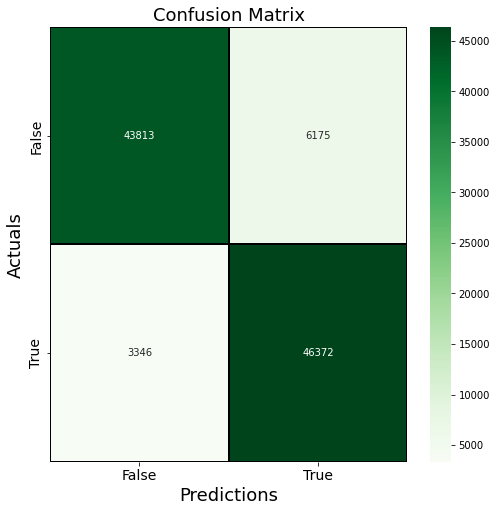

AUC Score:  0.9685096445352123


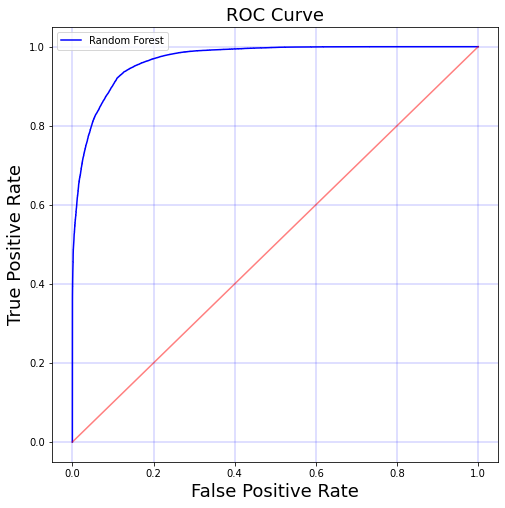

In [26]:
# Confusion Matrix Function
def make_confusion_matrix(test, pred):
    conf_mat = confusion_matrix(test, pred)
    plt.figure(figsize=(8, 8))
    ax = seaborn.heatmap(conf_mat, annot=True,
        cmap=plt.cm.Greens, fmt='g', 
        linewidths=0.1, linecolor='black')
    ax.xaxis.set_ticklabels(['False', 'True'], fontsize=14)
    ax.yaxis.set_ticklabels(['False', 'True'], fontsize=14)
    ax.set_xlabel('Predictions', fontsize=18)
    ax.set_ylabel('Actuals', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=18)
    plt.show()

def make_roc_curve(model):
    pred_prob = model.predict_proba(x_te)[:,1]
    fpr1, tpr1, _a = roc_curve(y_te, pred_prob, pos_label=1)
    random_probs = [0 for i in range(len(y_te))]
    p_fpr, p_tpr, _b = roc_curve(y_te, random_probs, pos_label=1)
    auc_score = roc_auc_score(y_te, pred_prob)
    print("AUC Score: ", auc_score)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr1, tpr1, color='blue', label="Random Forest")
    plt.plot(p_fpr, p_tpr, color='red', alpha=0.5)
    plt.title('ROC Curve', fontsize=18)
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.legend(loc='best')
    plt.grid(color='b', ls = '-', lw=0.25)
    plt.show()



# Sidd Logistic Regression


# Judd Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=12)
forest.fit(x_tr, y_tr)

pred = forest.predict(x_te)
print("Random Forest Accuracy: ", metrics.accuracy_score(y_te, pred))
make_confusion_matrix(y_te, pred)

make_roc_curve(forest)


# Matt Decison Trees